## Business Problem

**create a model that can help predict a species of a penguin based on physical atrributes**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('E:\\All Datasets\\penguins_size.csv')
df.head()

# OUTPUT VARIABLE IS SEX

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## EDA

In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [6]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [7]:
df['sex'].value_counts()  # here is one dot, so remove(below code)

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [8]:
df=df[df['sex']!='.']
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [9]:
df['sex'].value_counts()  # here no . 

MALE      168
FEMALE    165
Name: sex, dtype: int64

### data visulisation

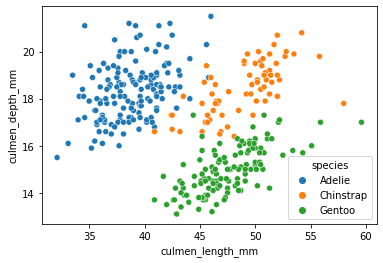

In [10]:
sns.scatterplot(data=df,x='culmen_length_mm',y='culmen_depth_mm',hue='species')
plt.show()


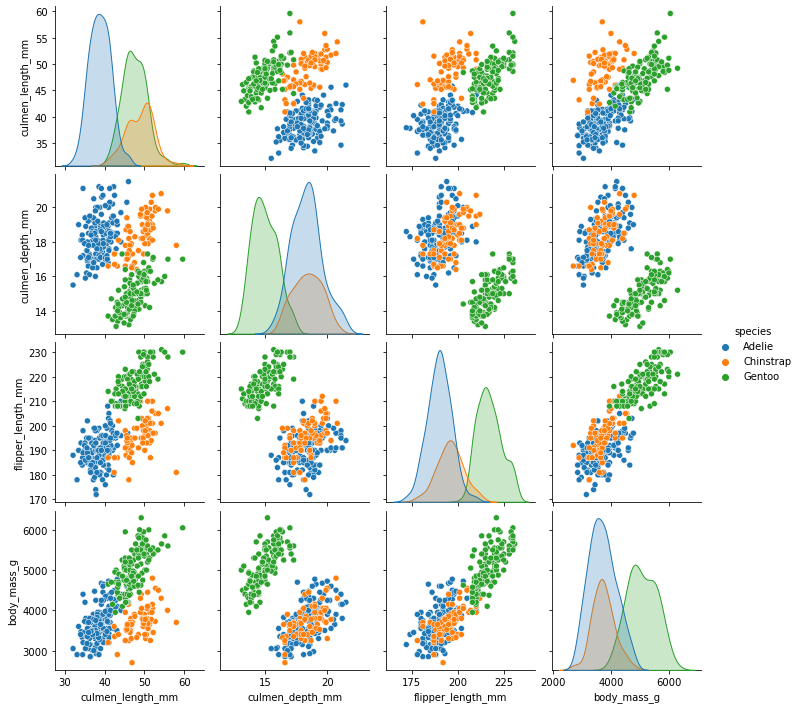

In [11]:
sns.pairplot(data=df,hue='species')
plt.show()

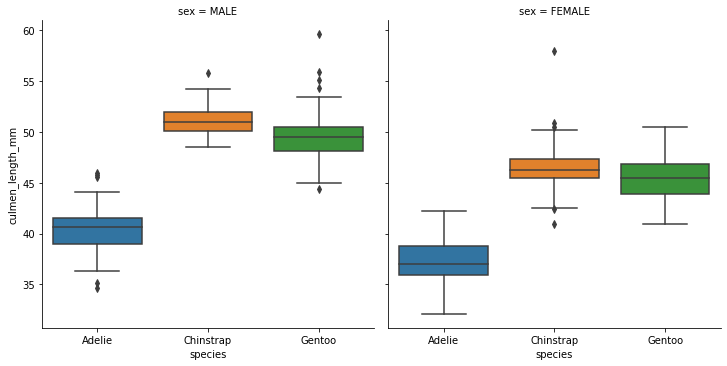

In [12]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex')
plt.show()

### Feature Enginneering

In [13]:
df.isna().sum()      # df.isnull().sum()   these two  are same

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [14]:
df=df.dropna()    # 333 entries are there 18 we can drop

# how many records are check

In [15]:
df.shape

(333, 7)

In [16]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [19]:
x=pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y=df['species']

**train test split**

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=33)

In [23]:
x_train.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
281,46.2,14.9,221.0,5300.0,0,0,1
292,48.2,15.6,221.0,5100.0,0,0,1
331,49.8,15.9,229.0,5950.0,0,0,1
32,39.5,17.8,188.0,3300.0,1,0,0
155,45.4,18.7,188.0,3525.0,1,0,0


In [25]:
pd.DataFrame(y_train.head())

,species
281,Gentoo
292,Gentoo
331,Gentoo
32,Adelie
155,Chinstrap


### Modelling

**Dicision tree with default hyperparameter**

In [26]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()

model.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
base_pred=model.predict(x_test)
pd.DataFrame(base_pred)

,0
0,Chinstrap
1,Gentoo
2,Adelie
3,Gentoo
4,Gentoo
...,...
95,Adelie
96,Gentoo
97,Gentoo
98,Adelie


In [31]:
pred_train = model.predict(x_train)
pd.DataFrame(pred_train)

,0
0,Gentoo
1,Gentoo
2,Gentoo
3,Adelie
4,Chinstrap
...,...
228,Chinstrap
229,Chinstrap
230,Adelie
231,Gentoo


**Evaluation**

In [32]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [36]:
accuracy_score(y_train,pred_train)   # ith y ch vaprtav ani pred ....x ch ajibath nh

1.0

In [35]:
accuracy_score(y_test,base_pred)

0.97

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


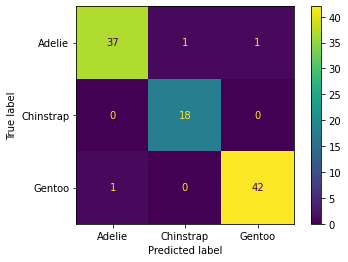

In [39]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()


In [40]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        39
   Chinstrap       0.95      1.00      0.97        18
      Gentoo       0.98      0.98      0.98        43

    accuracy                           0.97       100
   macro avg       0.97      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



## this model is creating useing DT and we took feature importance using that model

**here we can remove features(columns) which less than 0.05**

In [44]:
a=model.feature_importances_
a

array([0.37331586, 0.03215698, 0.50358828, 0.        , 0.09093887,
       0.        , 0.        ])

In [49]:
pd.DataFrame(index=x.columns,data=a,columns=['feature importane'])

,feature importane
culmen_length_mm,0.373316
culmen_depth_mm,0.032157
flipper_length_mm,0.503588
body_mass_g,0.000000
island_Dream,0.090939
island_Torgersen,0.000000
sex_MALE,0.000000


### Visualize tree

In [50]:
from sklearn.tree import plot_tree

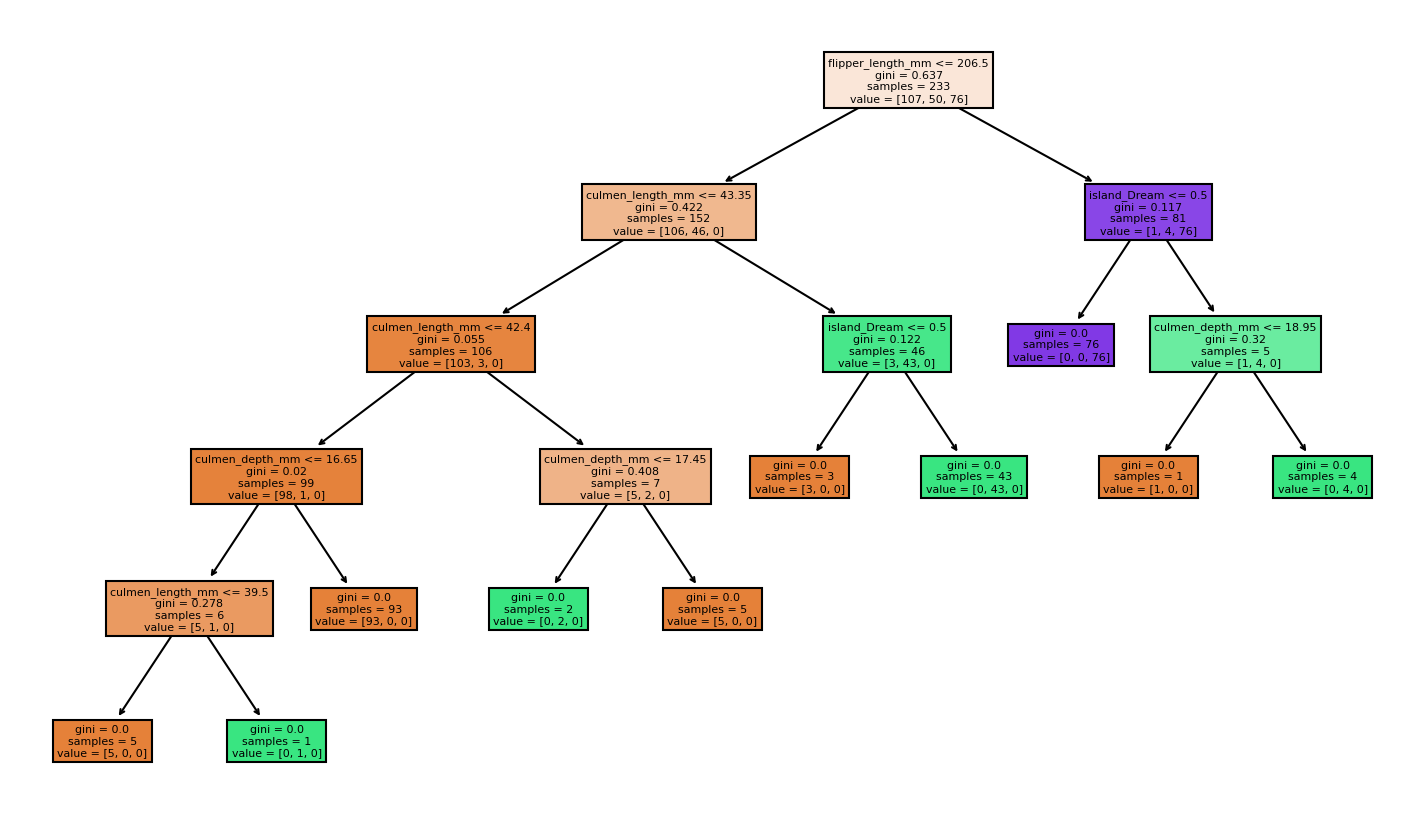

In [54]:
plt.figure(figsize=(12,7),dpi=150)
plot_tree(model,filled=True,feature_names=x.columns)
plt.show()

## Optimization pruning of DT

In [56]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree

DecisionTreeClassifier(max_depth=2)

In [58]:
def report_model(model):
    model.fit(x_train,y_train)
    model_preds = model.predict(x_test)
    pred_train = model.predict(x_train)
    print('train accuracy',accuracy_score(y_train,pred_train))
    print('test accuracy',accuracy_score(y_test,model_preds))
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=x.columns)


train accuracy 0.9699570815450643
test accuracy 0.95


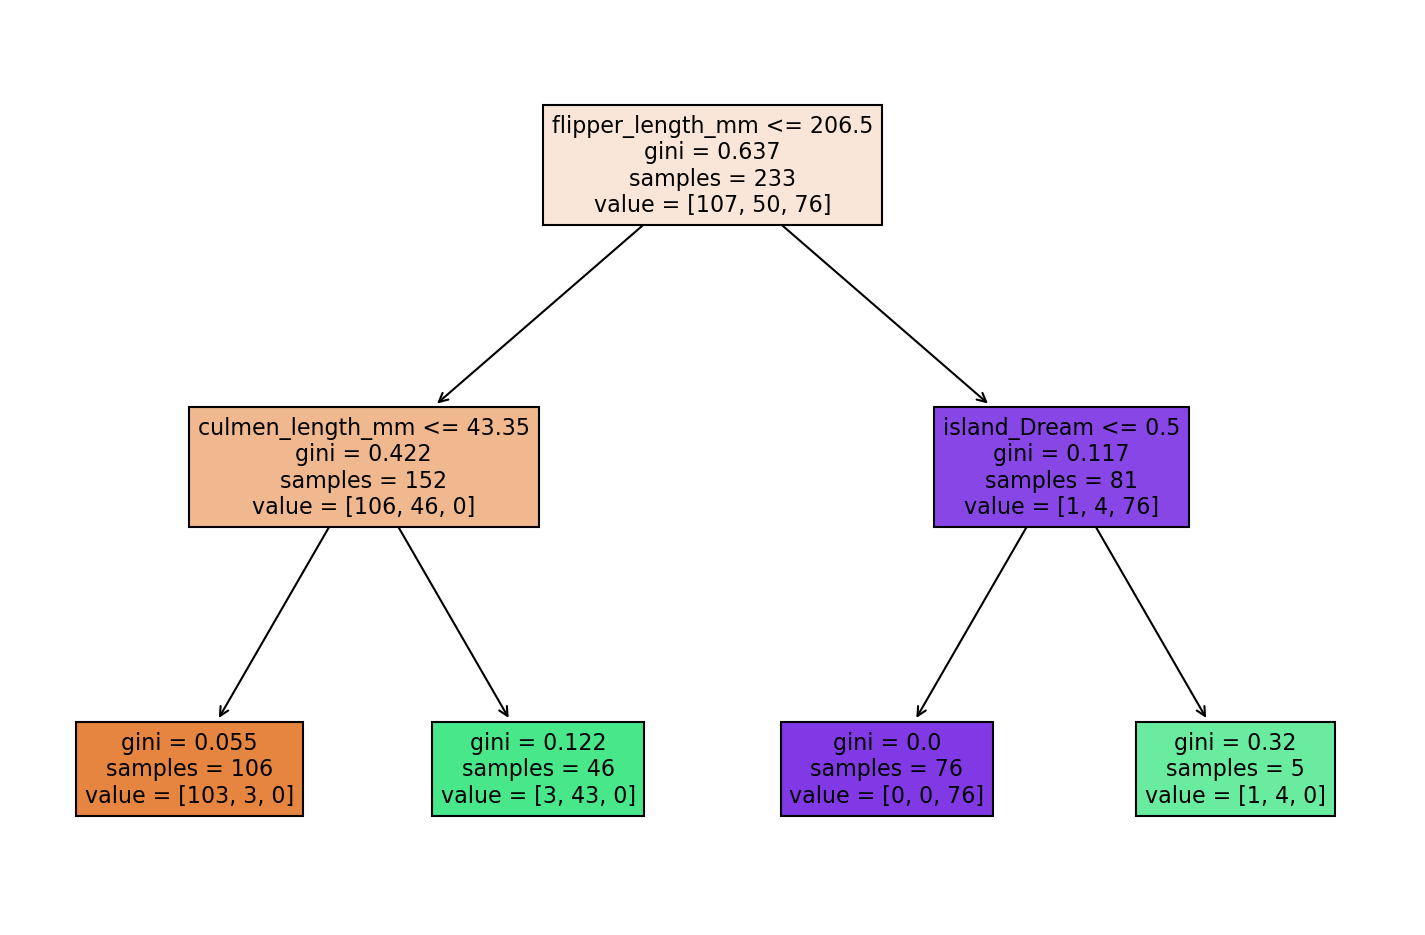

In [59]:
report_model(pruned_tree)

## max leaf nodes

In [60]:
pruned_tree= DecisionTreeClassifier(max_leaf_nodes=3)

train accuracy 0.9527896995708155
test accuracy 0.94


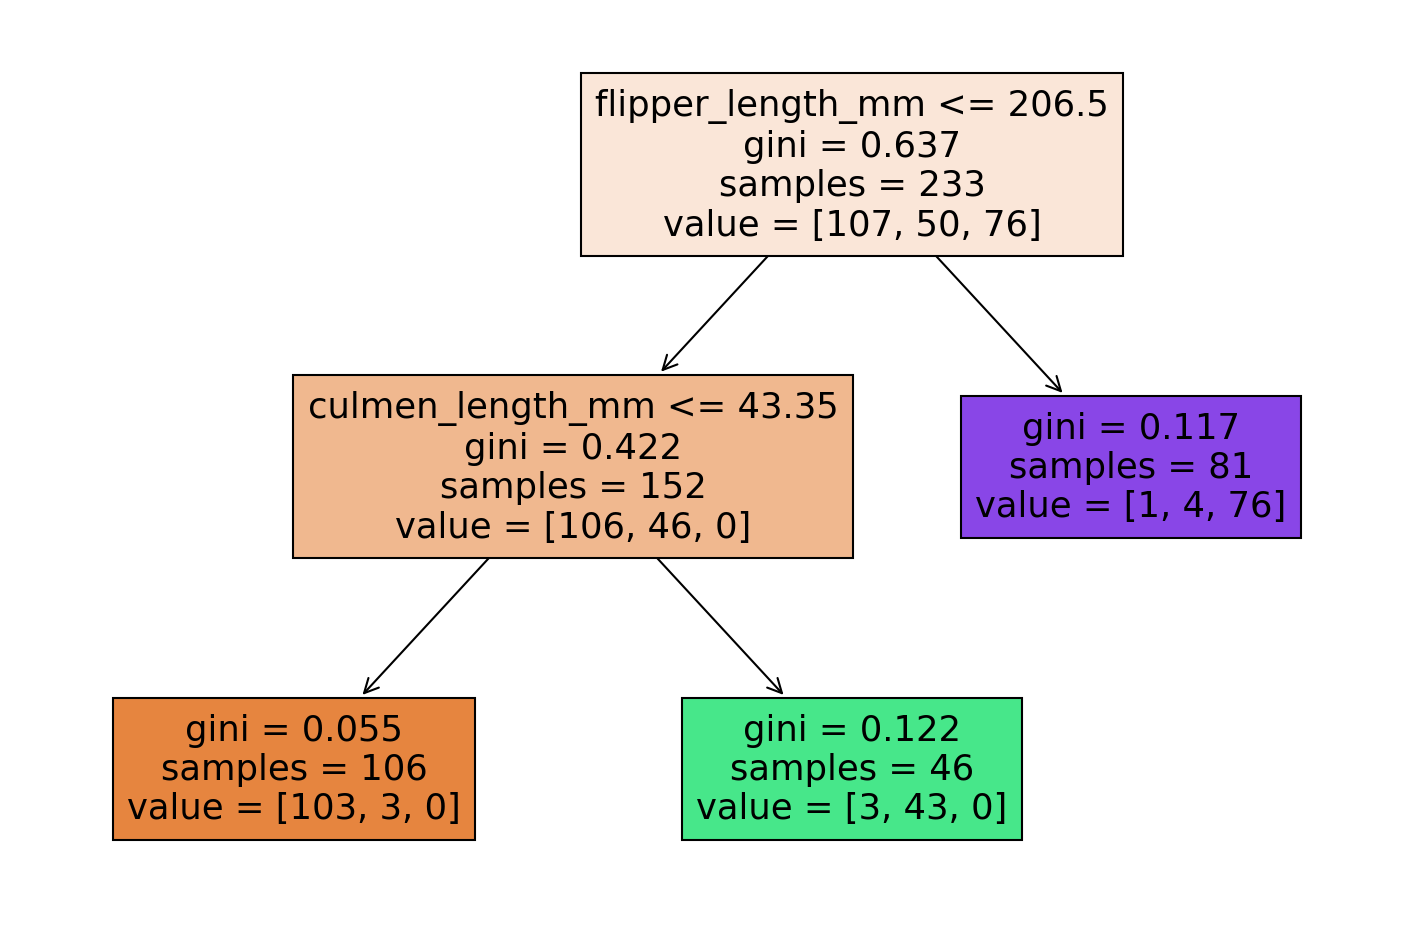

In [61]:
report_model(pruned_tree)